In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import netCDF4 as nc
import xarray as xr
import scipy.ndimage
import scipy as sp


In [2]:
# Read in the data: This is the ds/dt field at the ice base 

data = pd.read_csv('../Simulations/CurrentTests/Test10Layers/dsdtOutputTime5.csv', sep=",")

data


,dsdt,smb,Points:0,Points:1,Points:2
0,1.136900e-13,0.30556,961180.0,1895000.0,-321.57
1,0.000000e+00,0.32071,962880.0,1895000.0,-310.12
2,1.136900e-13,0.41561,968830.0,1895000.0,-309.69
3,-1.136900e-13,0.45383,970970.0,1895000.0,-265.33
4,0.000000e+00,0.48820,973460.0,1895000.0,-313.45
...,...,...,...,...,...
10370,1.817400e-07,0.66262,978010.0,1938200.0,-312.40
10371,4.981100e-07,0.54420,977360.0,1939700.0,-307.59
10372,-7.717800e-08,0.71693,978440.0,1938300.0,-308.90
10373,3.911500e-07,0.59579,977820.0,1939800.0,-310.83


In [3]:
# Make columns to store the thickness change and BMB

data['ThicknessChange'] = [0] * len(data)
data['BMB'] = [0.85] * len(data)
data['BMBnew'] = [0] * len(data)


In [4]:
# Calculate the thickness change at each point

data['ThicknessChange'] = - data['dsdt'] * (10/9)

# Adjust BMB by ds/dt

data['BMBnew'] = data['smb'] - data['ThicknessChange']


In [5]:
# Interpolate the data

# Find min and max coords

x_min = min(data["Points:0"])
y_min = min(data["Points:1"])
x_max = max(data["Points:0"])
y_max = max(data["Points:1"])
nxy = 10000

# Define structured domain

x = np.linspace(x_min, x_max, nxy)
y = np.linspace(y_min, y_max, nxy)
grid_x, grid_y = np.mgrid[x_min:x_max:1000j, y_min:y_max:1000j]

BMB_new = scipy.interpolate.griddata((data["Points:0"], data["Points:1"]), data["BMBnew"], (grid_x, grid_y), method='linear')


In [6]:

# Apply a Gaussian filter

def Gauss(param, data):
    
    sigma_x = param
    sigma_y = param

    sigma = [sigma_x, sigma_y]
    return sp.ndimage.gaussian_filter(data, sigma)



In [7]:
# Apply different smoothings

Gauss1 = Gauss(1.0, BMB_new)
Gauss5 = Gauss(5.0, BMB_new)
Gauss10 = Gauss(10.0, BMB_new)
Gauss20 = Gauss(20.0, BMB_new)
Gauss50 = Gauss(50.0, BMB_new)


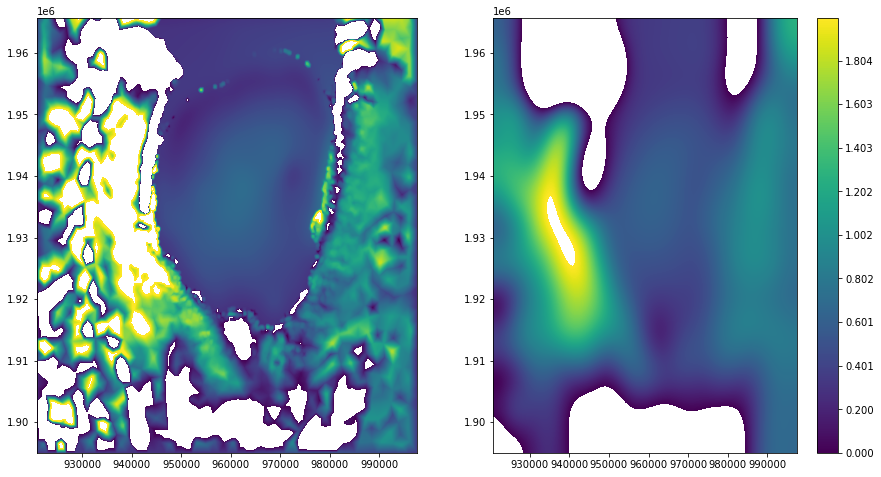

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15, 8))
CS = ax[0].contourf(grid_x, grid_y, Gauss1, levels=np.linspace(0.0,2.0,500))
CS = ax[1].contourf(grid_x, grid_y, Gauss50, levels=np.linspace(0.0,2.0,500))

fig.colorbar(CS)
